In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Загружаем основной файл с данными
df = pd.read_excel("D:/Test_Komus/test.xls", header=0)

In [4]:
df.head()

,ТС (120904),Автор цены (12149001),Назв. товара (12060101),Имя автора цены (121490011),Артикул (120601),Отдел автора цены (121490012),Номер заказа (121412),ID СЦО (12149002),Оператор сценария (12149003),ФИО оператора сценария (121490031),...,Дата активации цены (12149004),Дата окончания действия (12149005),ФИО ТП (1254041),Код ТП (125404),Название клиента (12540101),Код клиента (125401),SAP код клиента (125423),Название ТС (1209041),Сумма строк (руб) (125203),Себестоимость строки (руб) (125231)
0,Т10,288454,Перчатки нитрил. INEKTA неопудр. текст. н/ст. ...,NaN,1593347,NaN,48513832.0,NaN,NaN,NaN,...,NaT,NaN,Кубасов Дмитрий Сергеевич,1934,"ООО ""ЕКАТЕРИНБУРГ ЯБЛОКО""",2110409,1601213,ТР Комус Медицина,2550.02,1732.534799
1,Т10,288454,"Перчатки нитрил., NITRILE OPTIMA, голубые, 3гр...",NaN,1505505,NaN,48513832.0,NaN,NaN,NaN,...,NaT,NaN,Кубасов Дмитрий Сергеевич,1934,"ООО ""ЕКАТЕРИНБУРГ ЯБЛОКО""",2110409,1601213,ТР Комус Медицина,2509.98,1964.998813
2,Т10,288454,Перчатки одноразовые Hongray нитр неопудр.текс...,NaN,1434386,NaN,48425444.0,NaN,NaN,NaN,...,NaT,NaN,Любименко Татьяна Владимировна,4514,"ООО ""СБСВ-КЛЮЧАВТО ОЛИМП""",540757,1950002,ТР Комус Медицина,2235.00,1755.006347
3,Т10,288454,Перчатки одноразовые виниловые универ наз про...,NaN,1199335,NaN,17703862.0,NaN,NaN,NaN,...,NaT,NaN,Кубасов Дмитрий Сергеевич,1934,"ООО ""ЕАПТЕКА""",1935317,1704905,ТР Комус Медицина,717.01,469.577248
4,Т10,288454,Перчатки одноразовые виниловые универ наз про...,NaN,1199335,NaN,48499838.0,NaN,NaN,NaN,...,NaT,NaN,Любименко Татьяна Владимировна,4514,"ООО ""КРОП-РИТЕЙЛ""",2890160,7625434,ТР Комус Медицина,239.00,149.997386


# EDA

In [5]:
# Проверим тип данных по колонкам, это важно при соединении данных из разных источников, если
# тип данных не совпадает, соединение произойдет некорректно. Также посмотрим на количество пропусков 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4208 entries, 0 to 4207
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ТС (120904)                          4208 non-null   object        
 1   Автор цены (12149001)                2559 non-null   object        
 2   Назв. товара (12060101)              4208 non-null   object        
 3   Имя автора цены (121490011)          1969 non-null   object        
 4   Артикул (120601)                     4208 non-null   int64         
 5   Отдел автора цены (121490012)        1969 non-null   object        
 6   Номер заказа (121412)                4201 non-null   float64       
 7   ID СЦО (12149002)                    2544 non-null   float64       
 8   Оператор сценария (12149003)         2544 non-null   object        
 9   ФИО оператора сценария (121490031)   2544 non-null   object        
 10  Источник цен

In [6]:
# Количество незаполненных значений по столбцам
df.isnull().sum()

ТС (120904)                               0
Автор цены (12149001)                  1649
Назв. товара (12060101)                   0
Имя автора цены (121490011)            2239
Артикул (120601)                          0
Отдел автора цены (121490012)          2239
Номер заказа (121412)                     7
ID СЦО (12149002)                      1664
Оператор сценария (12149003)           1664
ФИО оператора сценария (121490031)     1664
Источник цены (12149014)                  0
Атрибут источника цены (12149015)         7
Приоритет цены (12149013)              1664
Дата активации цены (12149004)         1664
Дата окончания действия (12149005)     1664
ФИО ТП (1254041)                          0
Код ТП (125404)                           0
Название клиента (12540101)               0
Код клиента (125401)                      0
SAP код клиента (125423)                  0
Название ТС (1209041)                     0
Сумма строк  (руб) (125203)               0
Себестоимость строки (руб) (1252

Из общей информации по кадру датафрейма видно, что больше половины данных в выборке имеют признак СЦО (2554) и по ним заполнен признак ФИО оператора сценария. Выведем Фио СЦО и количество операторов сценария

In [7]:
df['ФИО оператора сценария (121490031)'].unique()

array([nan, 'Грицай Ярослав Юрьевич', 'Корнилова Наталья Владимировна',
       'Любименко Татьяна Владимировна', 'Борцова Ксения Алексеевна',
       'Мусихина Полина Максимовна', 'Кудряшова Ирина Алексеевна',
       'Данилина Александра Владимировна',
       'Анищенко Кристина Владимировна', 'Бунакова Кристина Борисовна',
       'Любицкая Наталия Александровна', 'Сергеева Ольга Сергеевна',
       'Калашникова Милана Владимировна', 'Волкова Елизавета Сергеевна',
       'Воеводова Наталья Леонидовна', 'Черенкова Дарья Александровна'],
      dtype=object)

In [8]:
df['ФИО оператора сценария (121490031)'].nunique()

15

Посмотрим какое количество ТП попало в выборку

In [57]:
df['ФИО ТП (1254041)'].nunique()

2

In [58]:
df['ФИО ТП (1254041)'].unique()

array(['Кубасов Дмитрий Сергеевич', 'Любименко Татьяна Владимировна'],
      dtype=object)

Выполнив группировку по ФИО оператора сценария и ТП, получится рассчитать основные бизнес-метрики в разрезе Товарных рынков и Товарных категорий, также оценить их в разрезе бизнес- регионов. Для этого необходимо обогатить основную таблицу данными, полученными из других источников. Для оптимизации работы с кадром данных, пустые значения ФИО оператора сценария заменим на "no author". Таким образом мы сможем разделить выборку на регулярное и СЦО по полю 'ФИО оператора сценария (121490031)' и провести необходимые расчеты

In [9]:
df['ФИО оператора сценария (121490031)'] = df['ФИО оператора сценария (121490031)'].fillna('no author')

In [10]:
df['ФИО оператора сценария (121490031)'].unique()

array(['no author', 'Грицай Ярослав Юрьевич',
       'Корнилова Наталья Владимировна', 'Любименко Татьяна Владимировна',
       'Борцова Ксения Алексеевна', 'Мусихина Полина Максимовна',
       'Кудряшова Ирина Алексеевна', 'Данилина Александра Владимировна',
       'Анищенко Кристина Владимировна', 'Бунакова Кристина Борисовна',
       'Любицкая Наталия Александровна', 'Сергеева Ольга Сергеевна',
       'Калашникова Милана Владимировна', 'Волкова Елизавета Сергеевна',
       'Воеводова Наталья Леонидовна', 'Черенкова Дарья Александровна'],
      dtype=object)

In [59]:
df.head(2)

,ТС (120904),Автор цены (12149001),Назв. товара (12060101),Имя автора цены (121490011),Артикул (120601),Отдел автора цены (121490012),Номер заказа (121412),ID СЦО (12149002),Оператор сценария (12149003),ФИО оператора сценария (121490031),...,Дата активации цены (12149004),Дата окончания действия (12149005),ФИО ТП (1254041),Код ТП (125404),Название клиента (12540101),Код клиента (125401),SAP код клиента (125423),Название ТС (1209041),Сумма строк (руб) (125203),Себестоимость строки (руб) (125231)
0,Т10,288454,Перчатки нитрил. INEKTA неопудр. текст. н/ст. ...,NaN,1593347,NaN,48513832.0,NaN,NaN,no author,...,NaT,NaN,Кубасов Дмитрий Сергеевич,1934,"ООО ""ЕКАТЕРИНБУРГ ЯБЛОКО""",2110409,1601213,ТР Комус Медицина,2550.02,1732.534799
1,Т10,288454,"Перчатки нитрил., NITRILE OPTIMA, голубые, 3гр...",NaN,1505505,NaN,48513832.0,NaN,NaN,no author,...,NaT,NaN,Кубасов Дмитрий Сергеевич,1934,"ООО ""ЕКАТЕРИНБУРГ ЯБЛОКО""",2110409,1601213,ТР Комус Медицина,2509.98,1964.998813


Рассчитаем основные метрики по выборке:
- АКБ (количество уникальных кодов клиента)
- Средний чек (Сумма всех строк / на количество уникальных номеров заказа)
- ТО (Сумма всех строк)
- ВД (Сумма всех строк минус Сумма по себестоимости)
- КТН (Сумма всех строк / на Сумму по себестоимости)

In [13]:
ACB = df['Код клиента (125401)'].nunique()
AVCH = round(df['Сумма строк  (руб) (125203)'].sum()/df['Номер заказа (121412)'].nunique(), 2)
TO = df['Сумма строк  (руб) (125203)'].sum()
RV = round(df['Сумма строк  (руб) (125203)'].sum() - df['Себестоимость строки (руб) (125231)'].sum(), 2)
EXCH = round(df['Сумма строк  (руб) (125203)'].sum()/df['Себестоимость строки (руб) (125231)'].sum(), 2)

In [14]:
print(f"АКБ - {ACB}")
print(f"Средний чек, руб - {AVCH}")
print(f"ТО, руб - {TO}")
print(f"ВД, руб - {RV}")
print(f"КТН - {EXCH}")

АКБ - 114
Средний чек, руб - 10107.57
ТО, руб - 7479603.73
ВД, руб - 1810687.76
КТН - 1.32


Из основных метрик можно сделать косвенный вывод, что выборка рапрезентативная, поскольку Средний чек и КТН совпадают со значениями в целом по бизнесу. 

## Обогащение данных основной таблицы

In [15]:
# Читаем данные из таблицы с артикулами, полученными из Superclass
# Проверяем для каждого загруженного датасета тип данных для корректного соединения с основной таблицей
mx = pd.read_excel("D:\Test_Komus\Matrix.xlsx")

In [16]:
mx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392841 entries, 0 to 392840
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Артикул  392841 non-null  int64 
 1   ТК       392841 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.0+ MB


In [17]:
# Читаем данные из прартнерской базы
pr = pd.read_excel("D:\Test_Komus\db.xlsx", sheet_name='Partner')
reg = pd.read_excel("D:\Test_Komus\db.xlsx", sheet_name='Region')
sl = pd.read_excel("D:\Test_Komus\db.xlsx", sheet_name='Salers')

In [18]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251316 entries, 0 to 251315
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Код_клиента            251316 non-null  int64  
 1   КПЛ_карточка_партнера  251316 non-null  object 
 2   Город_физ_адрес        251316 non-null  object 
 3   Бизнес-регион          251316 non-null  int64  
 4   Код_ТП                 250975 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.6+ MB


In [60]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Бизнес-регион            9 non-null      int64 
 1   Название Бизнес-региона  9 non-null      object
dtypes: int64(1), object(1)
memory usage: 272.0+ bytes


In [20]:
sl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Код_ТП                2177 non-null   float64
 1   ФИО_ТП                2177 non-null   object 
 2   Категория сотрудника  2178 non-null   object 
 3   Код_ТРП               2042 non-null   object 
 4   ФИО_ТРП               2042 non-null   object 
 5   Наименование_отдела   2178 non-null   object 
dtypes: float64(1), object(5)
memory usage: 102.2+ KB


In [21]:
res = pd.merge(df, mx, how='left',left_on='Артикул (120601)',right_on='Артикул').drop(columns=['Артикул'])


In [22]:
res = res.merge( pr[['Код_клиента', 'КПЛ_карточка_партнера','Бизнес-регион']], how='left', left_on='Код клиента (125401)', right_on='Код_клиента').drop(columns='Код_клиента')
res = res.merge(reg, how='left', on='Бизнес-регион')
res = res.merge(sl[['Код_ТП','Категория сотрудника','Наименование_отдела']], how='left', left_on='Код ТП (125404)', right_on='Код_ТП').drop(columns='Код_ТП')
res.head()

,ТС (120904),Автор цены (12149001),Назв. товара (12060101),Имя автора цены (121490011),Артикул (120601),Отдел автора цены (121490012),Номер заказа (121412),ID СЦО (12149002),Оператор сценария (12149003),ФИО оператора сценария (121490031),...,SAP код клиента (125423),Название ТС (1209041),Сумма строк (руб) (125203),Себестоимость строки (руб) (125231),ТК,КПЛ_карточка_партнера,Бизнес-регион,Название Бизнес-региона,Категория сотрудника,Наименование_отдела
0,Т10,288454,Перчатки нитрил. INEKTA неопудр. текст. н/ст. ...,NaN,1593347,NaN,48513832.0,NaN,NaN,no author,...,1601213,ТР Комус Медицина,2550.02,1732.534799,Медицинские перчатки,6,1.0,БР МОСКВА,2 категория,ГП Торговля
1,Т10,288454,"Перчатки нитрил., NITRILE OPTIMA, голубые, 3гр...",NaN,1505505,NaN,48513832.0,NaN,NaN,no author,...,1601213,ТР Комус Медицина,2509.98,1964.998813,Медицинские перчатки,6,1.0,БР МОСКВА,2 категория,ГП Торговля
2,Т10,288454,Перчатки одноразовые Hongray нитр неопудр.текс...,NaN,1434386,NaN,48425444.0,NaN,NaN,no author,...,1950002,ТР Комус Медицина,2235.00,1755.006347,Медицинские перчатки,5,5.0,БР ЮГ,1 категория,ГП Производство и Торговля
3,Т10,288454,Перчатки одноразовые виниловые универ наз про...,NaN,1199335,NaN,17703862.0,NaN,NaN,no author,...,1704905,ТР Комус Медицина,717.01,469.577248,Медицинские перчатки,5,1.0,БР МОСКВА,2 категория,ГП Торговля
4,Т10,288454,Перчатки одноразовые виниловые универ наз про...,NaN,1199335,NaN,48499838.0,NaN,NaN,no author,...,7625434,ТР Комус Медицина,239.00,149.997386,Медицинские перчатки,7,5.0,БР ЮГ,1 категория,ГП Производство и Торговля


In [23]:
res.isnull().sum()

ТС (120904)                               0
Автор цены (12149001)                  1649
Назв. товара (12060101)                   0
Имя автора цены (121490011)            2239
Артикул (120601)                          0
Отдел автора цены (121490012)          2239
Номер заказа (121412)                     7
ID СЦО (12149002)                      1664
Оператор сценария (12149003)           1664
ФИО оператора сценария (121490031)        0
Источник цены (12149014)                  0
Атрибут источника цены (12149015)         7
Приоритет цены (12149013)              1664
Дата активации цены (12149004)         1664
Дата окончания действия (12149005)     1664
ФИО ТП (1254041)                          0
Код ТП (125404)                           0
Название клиента (12540101)               0
Код клиента (125401)                      0
SAP код клиента (125423)                  0
Название ТС (1209041)                     0
Сумма строк  (руб) (125203)               0
Себестоимость строки (руб) (1252

Использованный файл с данными партнеров  не содержал данных для 389 записей основного файла. Для удобства работы заполним пустые значения по этим партнерам на unknown

In [24]:
res[['КПЛ_карточка_партнера', 'Бизнес-регион', 'Название Бизнес-региона']] = res[['КПЛ_карточка_партнера', 'Бизнес-регион', 'Название Бизнес-региона']].fillna('unknown')

In [25]:
# Для формирования отчета добавим в полученную таблицу столбцы ВД_руб 
res['ВД_руб'] = round(res['Сумма строк  (руб) (125203)'] - res['Себестоимость строки (руб) (125231)'], 2)


In [26]:
res.head()

,ТС (120904),Автор цены (12149001),Назв. товара (12060101),Имя автора цены (121490011),Артикул (120601),Отдел автора цены (121490012),Номер заказа (121412),ID СЦО (12149002),Оператор сценария (12149003),ФИО оператора сценария (121490031),...,Название ТС (1209041),Сумма строк (руб) (125203),Себестоимость строки (руб) (125231),ТК,КПЛ_карточка_партнера,Бизнес-регион,Название Бизнес-региона,Категория сотрудника,Наименование_отдела,ВД_руб
0,Т10,288454,Перчатки нитрил. INEKTA неопудр. текст. н/ст. ...,NaN,1593347,NaN,48513832.0,NaN,NaN,no author,...,ТР Комус Медицина,2550.02,1732.534799,Медицинские перчатки,6,1.0,БР МОСКВА,2 категория,ГП Торговля,817.49
1,Т10,288454,"Перчатки нитрил., NITRILE OPTIMA, голубые, 3гр...",NaN,1505505,NaN,48513832.0,NaN,NaN,no author,...,ТР Комус Медицина,2509.98,1964.998813,Медицинские перчатки,6,1.0,БР МОСКВА,2 категория,ГП Торговля,544.98
2,Т10,288454,Перчатки одноразовые Hongray нитр неопудр.текс...,NaN,1434386,NaN,48425444.0,NaN,NaN,no author,...,ТР Комус Медицина,2235.00,1755.006347,Медицинские перчатки,5,5.0,БР ЮГ,1 категория,ГП Производство и Торговля,479.99
3,Т10,288454,Перчатки одноразовые виниловые универ наз про...,NaN,1199335,NaN,17703862.0,NaN,NaN,no author,...,ТР Комус Медицина,717.01,469.577248,Медицинские перчатки,5,1.0,БР МОСКВА,2 категория,ГП Торговля,247.43
4,Т10,288454,Перчатки одноразовые виниловые универ наз про...,NaN,1199335,NaN,48499838.0,NaN,NaN,no author,...,ТР Комус Медицина,239.00,149.997386,Медицинские перчатки,7,5.0,БР ЮГ,1 категория,ГП Производство и Торговля,89.00


## Визуализация данных

Визуализируем данные и посмотрим какое количество партнеров по регионам покупает через СЦО и сколько таких заказов

In [45]:
df_by_reg = res.loc[res['ФИО оператора сценария (121490031)'] !='no author'].groupby('Название Бизнес-региона').agg(
    qty_part = ('Код клиента (125401)', 'nunique'),
    qty_ord = ('Номер заказа (121412)', 'nunique')
).reset_index()
df_by_reg

,Название Бизнес-региона,qty_part,qty_ord
0,unknown,34,76
1,БР МОСКВА,13,267
2,БР ЮГ,42,226


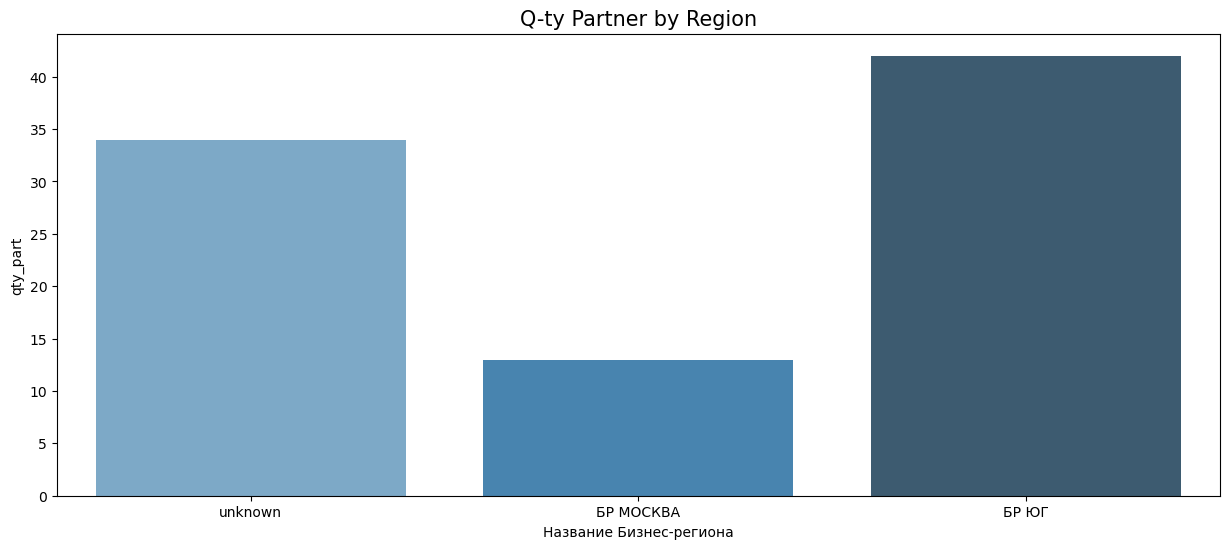

In [46]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='Название Бизнес-региона',
                 y='qty_part',
                 data=df_by_reg,
                 palette="Blues_d")\
                .set_title("Q-ty Partner by Region",fontsize=15)

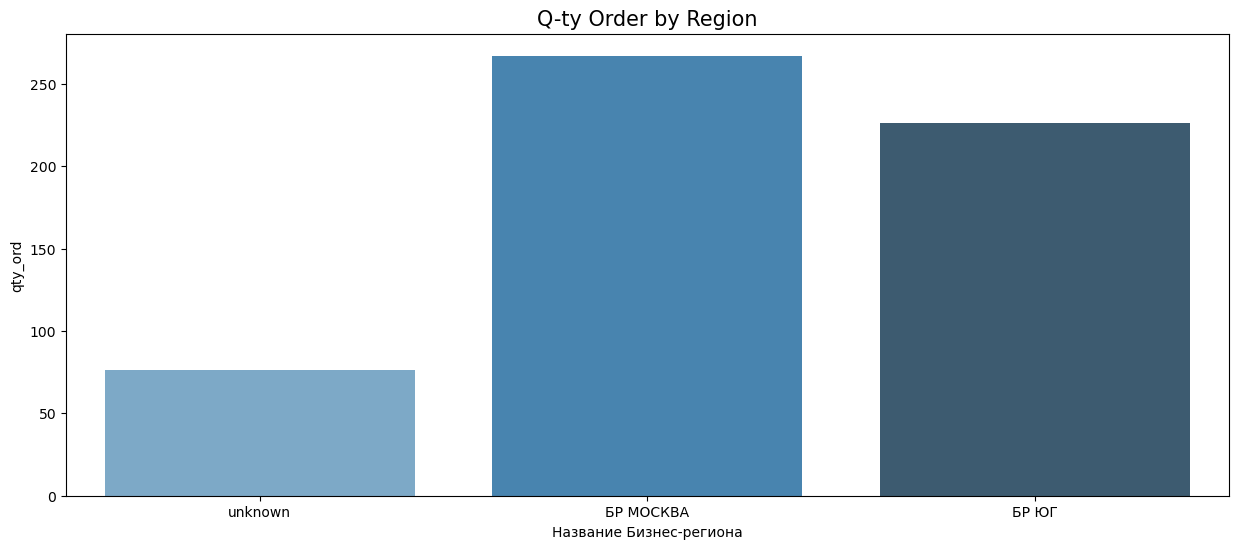

In [47]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='Название Бизнес-региона',
                 y='qty_ord',
                 data=df_by_reg,
                 palette="Blues_d")\
                .set_title("Q-ty Order by Region",fontsize=15)

Из построенных визуализаций можно сделать вывод, что в БР Москва мы имеем партнерскую базу, с большой регулярностью заказов, нежели в других БР

В разрезе Торговых представителей, посмотрим сколько Товарных категорий они продают с СЦО и какой у ТП оборот

In [49]:
df_by_tp = res.loc[res['ФИО оператора сценария (121490031)'] !='no author'].groupby('ФИО ТП (1254041)').agg(
    qty_tk = ('ТК', 'nunique'),
    tot_to = ('Сумма строк  (руб) (125203)', sum)
).reset_index()
df_by_tp

,ФИО ТП (1254041),qty_tk,tot_to
0,Кубасов Дмитрий Сергеевич,123,1465561.11
1,Любименко Татьяна Владимировна,82,3164589.24


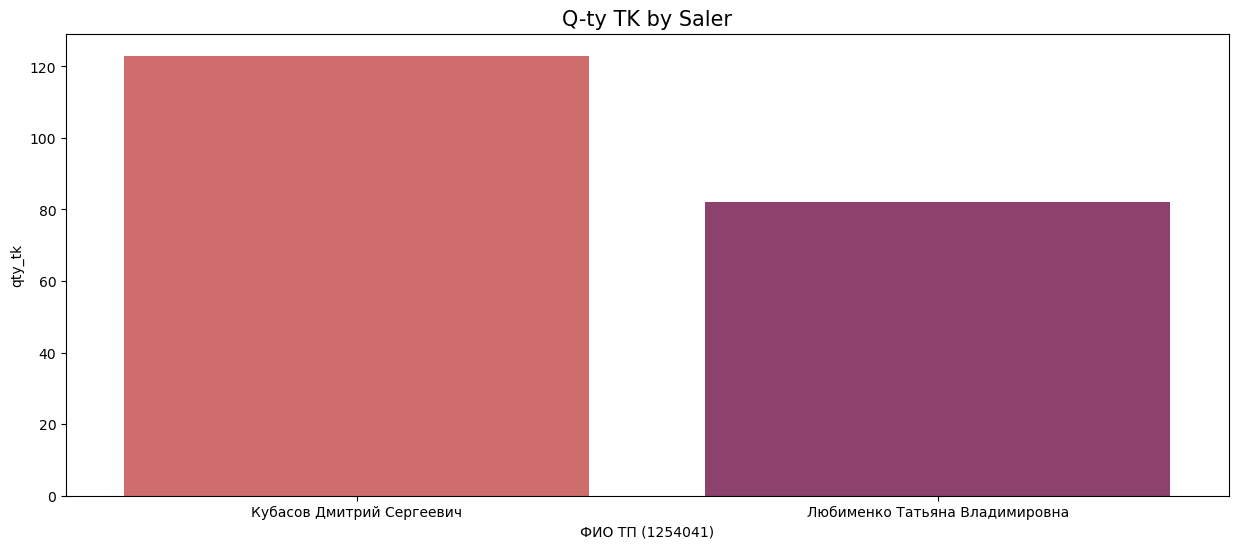

In [55]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='ФИО ТП (1254041)',
                 y='qty_tk',
                 data=df_by_tp,
                 palette="flare")\
                .set_title("Q-ty TK by Saler",fontsize=15)

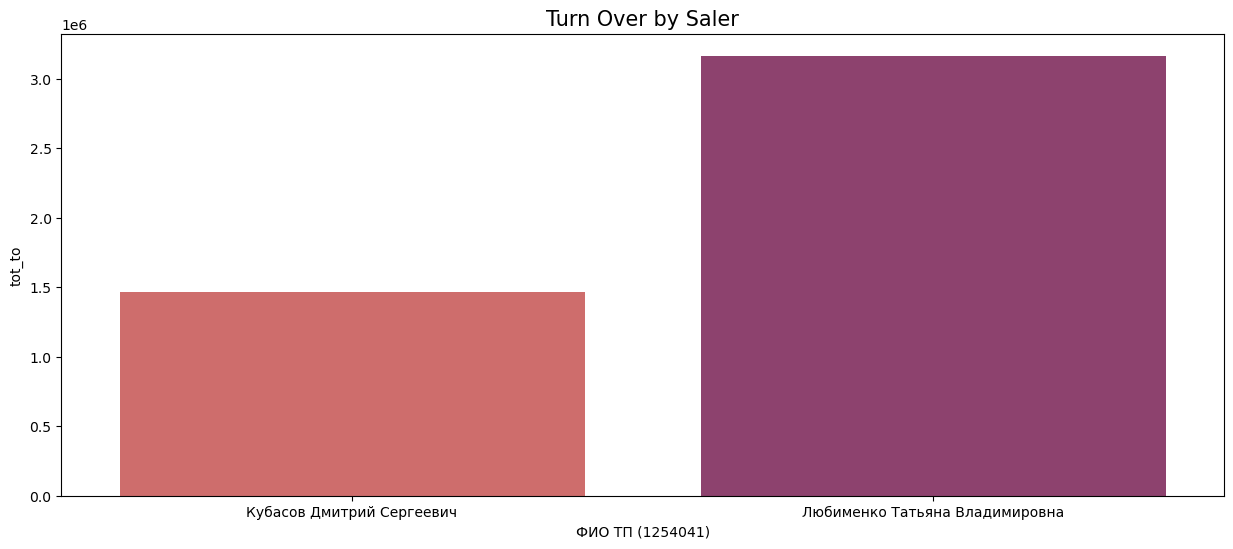

In [56]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='ФИО ТП (1254041)',
                 y='tot_to',
                 data=df_by_tp,
                 palette="flare")\
                .set_title("Turn Over by Saler",fontsize=15)

Из визуализации видно, что ТП первой категории Любименко, сфокусирована на меньшем количестве ТК(82 против 123), при этом делает в 2 раза больше оборот по отношению к своему коллеге

In [27]:
# Сохраняем полученный датафрей в XL файл для дальнейшей работы
res.to_excel('test_res.xlsx', index=False)

# Отчеты для расчета мотивации Спецсбыт

Соберем отчет с основными метриками для расчета мотивации для операторов СЦО

In [28]:
# Формируем сводную таблицу с рассчетом основных показателей для мотивации
pv_res = pd.pivot_table(res, index = ['ФИО оператора сценария (121490031)'],
                             values=['Сумма строк  (руб) (125203)', 'Себестоимость строки (руб) (125231)',
                                    'ВД_руб','Номер заказа (121412)','Код клиента (125401)'],
                             aggfunc= {'Сумма строк  (руб) (125203)':[np.sum, np.mean],'Себестоимость строки (руб) (125231)':[np.sum], 
                                      'ВД_руб':[np.sum], 'Код клиента (125401)':[pd.Series.nunique], 'Номер заказа (121412)':[pd.Series.nunique]},
               fill_value=0).reset_index()
pv_res['КТН'] = round(pv_res['Сумма строк  (руб) (125203)','sum']/pv_res['Себестоимость строки (руб) (125231)','sum'], 2)

In [29]:
# Переименуем столбцы в понятные для бизнес-пользователя наименования, расставим столбцы в удобной последовательности
pv_res.columns = pv_res.columns.map('_'.join)
pv_res.columns = ['ФИО','ВД_руб', 'Кол-во партнеров', 'Кол-во заказов', 'С-сть, руб', 'Средний чек', 'ТО, руб', 'КТН']
pv_res = pv_res[['ФИО', 'Кол-во партнеров', 'Кол-во заказов', 'Средний чек', 'С-сть, руб', 'ТО, руб', 'ВД_руб', 'КТН']]

In [30]:
pv_res

,ФИО,Кол-во партнеров,Кол-во заказов,Средний чек,"С-сть, руб","ТО, руб",ВД_руб,КТН
0,no author,80,338,1712.411887,2.094493e+06,2849453.38,754960.56,1.36
1,Анищенко Кристина Владимировна,31,74,1873.048968,3.890019e+05,472008.34,83006.55,1.21
2,Борцова Ксения Алексеевна,7,26,2499.569556,3.287579e+05,449922.52,121164.71,1.37
3,Бунакова Кристина Борисовна,4,13,207.494423,1.491162e+04,21579.42,6667.78,1.45
4,Воеводова Наталья Леонидовна,2,3,2934.382727,2.990118e+04,32278.21,2377.05,1.08
5,Волкова Елизавета Сергеевна,1,4,18116.300000,1.739962e+05,181163.00,7166.84,1.04
6,Грицай Ярослав Юрьевич,14,258,958.716327,8.592681e+05,1015280.59,156012.50,1.18
7,Данилина Александра Владимировна,2,7,1804.502500,8.131120e+04,115488.16,34176.98,1.42
8,Калашникова Милана Владимировна,2,23,1546.386627,9.258771e+04,128350.09,35762.36,1.39
9,Корнилова Наталья Владимировна,14,28,5352.645227,4.793869e+05,706549.17,227162.25,1.47


Соберем отчет по торговым представителям по тем строкам заказа, где было пременено СЦО. Для фильтрации исключим из датасета те строки, где нет автора сценария СЦО

In [31]:
# Формируем сводную таблицу с рассчетом основных показателей для мотивации
res_tp = res.loc[res['ФИО оператора сценария (121490031)'] !='no author']
pv_tp = pd.pivot_table(res_tp, index = ['ФИО ТП (1254041)', 'Категория сотрудника'],
                             values=['Сумма строк  (руб) (125203)', 'Себестоимость строки (руб) (125231)',
                                    'ВД_руб','Номер заказа (121412)','Код клиента (125401)'],
                             aggfunc= {'Сумма строк  (руб) (125203)':[np.sum, np.mean],'Себестоимость строки (руб) (125231)':[np.sum], 
                                      'ВД_руб':[np.sum], 'Код клиента (125401)':[pd.Series.nunique], 'Номер заказа (121412)':[pd.Series.nunique]},
               fill_value=0).reset_index()
pv_tp['КТН'] = round(pv_tp['Сумма строк  (руб) (125203)','sum']/pv_tp['Себестоимость строки (руб) (125231)','sum'], 2)

In [32]:
# Переименуем столбцы в понятные для бизнес-пользователя наименования, расставим столбцы в удобной последовательности
pv_tp.columns = pv_tp.columns.map('_'.join)
pv_tp.columns = ['ФИО_ТП','Категория_сотрудника','ВД_руб', 'Кол-во партнеров', 'Кол-во заказов', 'С-сть, руб', 'Средний чек', 'ТО, руб', 'КТН']
pv_tp = pv_tp[['ФИО_ТП', 'Категория_сотрудника', 'Кол-во партнеров', 'Кол-во заказов', 'Средний чек', 'С-сть, руб', 'ТО, руб', 'ВД_руб', 'КТН']]

In [33]:
pv_tp

,ФИО_ТП,Категория_сотрудника,Кол-во партнеров,Кол-во заказов,Средний чек,"С-сть, руб","ТО, руб",ВД_руб,КТН
0,Кубасов Дмитрий Сергеевич,2 категория,14,269,1173.387598,1.188313e+06,1465561.11,277248.61,1.23
1,Любименко Татьяна Владимировна,1 категория,75,300,2443.698255,2.386110e+06,3164589.24,778478.89,1.33


In [308]:
pv_res.to_excel('report.xlsx', sheet_name='operator', index=False)

In [309]:
pv_tp.to_excel('report.xlsx', sheet_name='sale_manager', index=False)

In [34]:
with pd.ExcelWriter("report.xlsx", mode='w') as writer:
    pv_res.to_excel(writer, sheet_name='operator', index=False)
    pv_tp.to_excel(writer, sheet_name='sale_manager', index=False)
    writer.save()
    writer.close

c:\Users\lokky\anaconda3\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")
